In [4]:
import random
import numpy as np 
from scipy.stats import multivariate_normal as mvn
from matplotlib import pyplot as plt
#random.seed(23)
random.seed()

/home/houwaart/conda/lib/python2.7/site-packages/setuptools-20.3-py2.7.egg/pkg_resources/__init__.py:1248: UserWarning: /home/houwaart/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).


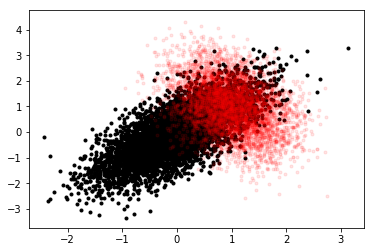

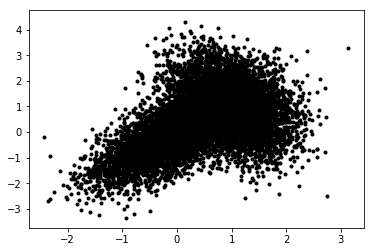

In [5]:
rm_a = [0,0]

rcov_a = [[0.5,0.5],[0.5,1]]
rm_b = [1,1]
rcov_b = [[0.3,-0.2],[-0.2,1]]
rounds = 5000

A=np.random.multivariate_normal(rm_a, rcov_a, rounds)
xa = [A[i][0] for i in range(len(A))]
ya = [A[i][1] for i in range(len(A))]
B=np.random.multivariate_normal(rm_b, rcov_b, rounds)
xb = [B[i][0] for i in range(len(A))]
yb = [B[i][1] for i in range(len(A))]

data = np.concatenate((A,B))

plt.scatter(xa,ya,color='k',marker='.')
plt.scatter(xb,yb,color='r',marker='.',alpha=0.1)
plt.show()

plt.scatter(xa,ya,color='k',marker='.')
plt.scatter(xb,yb,color='k',marker='.')
plt.show()

In [6]:
def e_step (theta,dat):
    ez = {}
    amv = mvn(theta['a'][0],theta['a'][1])
    bmv = mvn(theta['b'][0],theta['b'][1])
    mv = {'a':amv, 'b':bmv}
    for i in ['a','b']:
        ez[i] = []
        for j in range(0,2*rounds):
            ez[i].append(mv[i].pdf(dat[j])/(amv.pdf(dat[j])+bmv.pdf(dat[j])))
            #s = binom.pmf(h[j],10,theta['a']) + binom.pmf(h[j],10,theta['b'])
            #ez[i].append(binom.pmf(h[j],10,theta[i])/s)
#ezb0 = binom.pmf(h[0],10,th_b0)/(binom.pmf(h[0],10,th_a0)+binom.pmf(h[0],10,th_b0))
    return ez


In [7]:
def m_step(ez,dat):
    z = {'a':0, 'b':0}
    q00 = {'a':0, 'b':0}
    q10 = {'a':0, 'b':0}
    q01 = {'a':0, 'b':0}
    q11 = {'a':0, 'b':0}
    new_th = {'a':0, 'b':0}
    n={}
    n['a'] = 0
    n['b'] = 0
    for i in ['a','b']:
        for j in range(0,2*rounds):
            z[i] += ez[i][j]*dat[j]
    
            n[i] += ez[i][j]
            #print i +': ' + str(th[i])
        new_th[i] = z[i]/n[i]
    for i in ['a','b']:
        for j in range(0,2*rounds):
            q00[i] += ez[i][j]*((dat[j][0] - new_th[i][0])*(dat[j][0] - new_th[i][0]))
            q01[i] += ez[i][j]*((dat[j][0] - new_th[i][0])*(dat[j][1] - new_th[i][1]))
            q10[i] += ez[i][j]*((dat[j][1] - new_th[i][1])*(dat[j][0] - new_th[i][0]))
            q11[i] += ez[i][j]*((dat[j][1] - new_th[i][1])*(dat[j][1] - new_th[i][1]))
    
            n[i] += ez[i][j]
            #print i +': ' + str(th[i])
        
    return {'a': [new_th['a'],[[q00['a']/n['a'],q10['a']/n['a']],[q01['a']/n['a'],q11['a']/n['a']]]],'b':[new_th['b'],[[q00['b']/n['b'],q10['b']/n['b']],[q01['b']/n['b'],q11['b']/n['b']]]]}

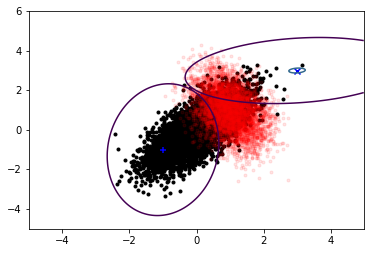

{'a': [array([ 1.06825417,  1.5817275 ]), [[0.13664081362932209, -0.085777068941479795], [-0.085777068941479795, 0.25302581054322565]]], 'b': [array([ 0.24005594, -0.00912146]), [[0.30597000448910866, 0.13482621752164095], [0.13482621752164095, 0.38975536268345251]]]}
{'a': [array([ 1.03165864,  1.51397575]), [[0.1376970613690463, -0.09663159538199341], [-0.09663159538199341, 0.26994179038420263]]], 'b': [array([ 0.19636299, -0.09454191]), [[0.3081290300650138, 0.13767657268667916], [0.13767657268667916, 0.34927693145838223]]]}
{'a': [array([ 1.02319647,  1.44873325]), [[0.14087741435627246, -0.10055094570922314], [-0.10055094570922314, 0.28970771891246239]]], 'b': [array([ 0.15484116, -0.14137638]), [[0.29978118439185819, 0.1374686684832907], [0.1374686684832907, 0.33569333056420952]]]}
{'a': [array([ 1.02574258,  1.38271608]), [[0.14294804048816462, -0.10493726090910828], [-0.10493726090910828, 0.31498780929506465]]], 'b': [array([ 0.10616242, -0.17630816]), [[0.28357335175764842, 0.

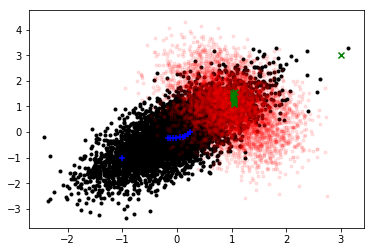

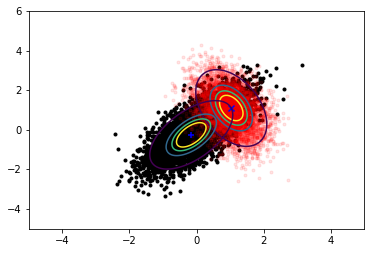

In [12]:
ct = {'a':[[3,3],[[2,0.2],[0.2,0.5]]],'b':[[-1,-1],[[0.5,0.1],[0.1,2]]]}
plotCurrentSol(ct)
plt.scatter(xa,ya,color='k',marker='.')
plt.scatter(xb,yb,color='r',marker='.',alpha=0.1)

plt.scatter(ct['a'][0][0],ct['a'][0][1],color='g',marker='x')
plt.scatter(ct['b'][0][0],ct['b'][0][1],color='b',marker='+')

for k in range(1,10):
    exz = e_step(ct,data)
    ct = m_step(exz,data)
    print ct
    plt.scatter(ct['a'][0][0],ct['a'][0][1],color='g',marker='x')
    plt.scatter(ct['b'][0][0],ct['b'][0][1],color='b',marker='+')

print ct
plt.show()

plotCurrentSol(ct)



In [11]:
def plotCurrentSol(theta):
    x, y = np.mgrid[-5:5:.01, -5:6:.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    plt.scatter(xa,ya,color='k',marker='.')
    plt.scatter(xb,yb,color='r',marker='.',alpha=0.1)

    amv = mvn(theta['a'][0],theta['a'][1])
    bmv = mvn(theta['b'][0],theta['b'][1])


    levels = np.arange(0.01,0.61,0.15)
    plt.contour(x,y,amv.pdf(pos),levels)
    plt.contour(x,y,bmv.pdf(pos),levels)

    plt.scatter(theta['a'][0][0],theta['a'][0][1],color='b',marker='x')
    plt.scatter(theta['b'][0][0],theta['b'][0][1],color='b',marker='+')

    plt.show()

In [240]:

data[1]

array([ 1.19568752,  2.97870718])